In [1]:
# Trains
# 1.	List all train names which terminates at  “ BANGALORE CANT”
# 2.	List all the Source stations which has train facility to “ BANGALORE CANT”
# 3.	Given a train number, list all the station names that train passes through before reaching destination station.
# 4.	Give the train details (Train number, source and destination station , distance in KMs) which covers longest distance.
# 5.	Give the train details (Train number, source and destination station , distance in KMs) which takes longer time to reach destination.
# 6.	List the station which has more number of train connectivity.
# Visualization:
# Draw bar chart to show the total number of trains starting from Mumbai, Bangalore, Delhi, Chennai and Kolkota. Station codes of Mumbai are ( CSTM, BCT, LTT, BDTS, PNVL), Bangalore (SBC, YPR, BNC), Delhi (DEC, DEE, DLI, DAZ, DSA, NDLS, DSJ, DKJ), Chennai (MPK, MS, MSB, MSC, MAS) and Kolkota is (KOAA, CP, HWH, SDAH)
# Draw pie chart for Delhi and Bangalore showing %age of trains handled ( Originating and Destination) by each stations in the given city.


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('trains.csv')
df.head(5)

,Train No.,train Name,islno,station Code,Station Name,Arrival time,Departure time,Distance,Source Station Code,source Station Name,Destination station Code,Destination Station Name
0,'00851',BNC SUVIDHA SPL,1,BBS,BHUBANESWAR,'00:00:00','22:50:00',0,BBS,BHUBANESWAR,BNC,BANGALORE CANT
1,'00851',BNC SUVIDHA SPL,2,BAM,BRAHMAPUR,'01:10:00','01:12:00',166,BBS,BHUBANESWAR,BNC,BANGALORE CANT
2,'00851',BNC SUVIDHA SPL,3,VSKP,VISAKHAPATNAM,'05:10:00','05:30:00',443,BBS,BHUBANESWAR,BNC,BANGALORE CANT
3,'00851',BNC SUVIDHA SPL,4,BZA,VIJAYAWADA JN,'11:10:00','11:20:00',793,BBS,BHUBANESWAR,BNC,BANGALORE CANT
4,'00851',BNC SUVIDHA SPL,5,RU,RENIGUNTA JN,'16:42:00','16:52:00',1169,BBS,BHUBANESWAR,BNC,BANGALORE CANT


In [4]:


#List all train names which terminates at  “ BANGALORE CANT”


#bc = bc.loc['BANGALORE CANT ']
#bc = df[df['Destination Station Name'] == 'BANGALORE CANT ']
# bc = bc.groupby('Destination Station Name').agg({'Destination Station Name':'unique'})

bc = df[df['Destination Station Name'] == 'BANGALORE CANT ']
bc = bc['train Name']
bc.unique()

array(['BNC SUVIDHA SPL', 'KYQ BNC SUVIDHA', 'BZA BNC PASS   '],
      dtype=object)

In [5]:
#List all the Source stations which has train facility to “ BANGALORE CANT”

bs = df['source Station Name'][df['Destination Station Name'] == 'BANGALORE CANT '].unique()

bs

array(['BHUBANESWAR    ', 'KAMAKHYA       ', 'VIJAYAWADA JN  '],
      dtype=object)

In [6]:
#Given a train number, list all the station names that train passes through before reaching destination station.

t_no = df.groupby(['Train No.']).agg({'Station Name':'unique'})
t_no = t_no.reset_index()
# t_no['\'00851\'']
t_no = t_no[t_no['Train No.'] == '\'00851\'']
list(t_no['Station Name'])


[array(['BHUBANESWAR    ', 'BRAHMAPUR      ', 'VISAKHAPATNAM  ',
        'VIJAYAWADA JN  ', 'RENIGUNTA JN   ', 'JOLARPETTAI    ',
        'BANGALORE CANT '], dtype=object)]

In [7]:
#Give the train details (Train number, source and destination station , distance in KMs) which covers longest distance

#MAX
lt =df[['Train No.','source Station Name','Destination Station Name','Distance']].sort_values('Distance',ascending = False).head(1)

lt

#SUM
# lt =df.groupby(['Train No.','source Station Name','Destination Station Name']).agg({'Distance':'sum'})
# lt = lt.reset_index()
# lt.sort_values('Distance', ascending = False)
# lt.head(1)


,Train No.,source Station Name,Destination Station Name,Distance
35519,'15906',DIBRUGARH,KANYAKUMARI,4273


In [8]:
#Give the train details (Train number, source and destination station , distance in KMs) 
#which takes longer time to reach destination.




In [9]:
#List the station which has more number of train connectivity.
df1 = df['Station Name'].value_counts()
df1 = df1.to_frame(name = 'total')

df1[df1['total']==df1['total'].max()]

# df1 = df['source Station Name  '].groupby('Station Name').agg({'Station Name':'count'})
# #df1 = df1.reset_index()
# #df1.sort_values('Station Name', ascending = False)
# df1

,total
VIJAYAWADA JN,313


In [10]:
# Draw bar chart to show the total number of trains starting from Mumbai, Bangalore, Delhi, Chennai and Kolkota. 
# Station codes of Mumbai are ( CSTM, BCT, LTT, BDTS, PNVL), 
# Bangalore (SBC, YPR, BNC), 
# Delhi (DEC, DEE, DLI, DAZ, DSA, NDLS, DSJ, DKJ), 
# Chennai (MPK, MS, MSB, MSC, MAS) and 
# Kolkata is ('KOAA ':'Kolkata', 'CP ':'Kolkata', 'HWH '::'Kolkata', 'SDAH ':'Kolkata')


list_city = {'CSTM ':'Mumbai','BCT ':'Mumbai','LTT ':'Mumbai','BDTS ':'Mumbai','PNVL ':'Mumbai','SBC ':'Bangalore','YPR ':'Bangalore','BNC ':'Bangalore','DEC ':'Delhi', 'DEE ':'Delhi','DLI ':'Delhi', 'DAZ ':'Delhi', 'DSA ':'Delhi', 'NDLS ':'Delhi', 'DSJ ':'Delhi', 'DKJ ':'Delhi','MPK ':'Chennai', 'MS ':'Chennai', 'MSB ':'Chennai', 'MSC ':'Chennai', 'MAS ':'Chennai','KOAA ':'Kolkata', 'CP ':'Kolkata', 'HWH ':'Kolkata', 'SDAH ':'Kolkata'}
df["Train_city"]=df["Source Station Code"].map(list_city)

city = df.dropna()
city5 = city.groupby(['Train_city']).agg({'Train No.':'nunique'})
city5 = city5.reset_index()
#city[city['Train_city']=='Mumbai']
city5

,Train_city,Train No.
0,Bangalore,93
1,Chennai,69
2,Delhi,56
3,Kolkata,102
4,Mumbai,84


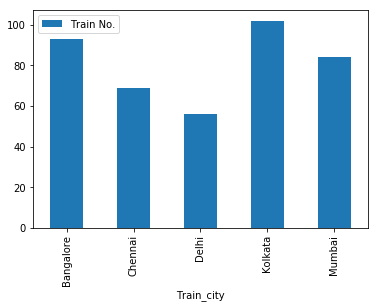

In [11]:

# names = list(city5.Train_city)
# data = list(city5['Train No.'])
# colors = ['red','blue','green','yellow','orange']
# x_count = np.arange(len(data))

#df.set_index('Train_city')[['Train No.']].plot.bar()


city5.plot.bar(x = 'Train_city', y = ['Train No.'])


In [12]:
# Draw pie chart for Delhi and Bangalore showing %age of trains handled ( Originating and Destination) by each stations 
#in the given city.
